**<h2>Homework 3 - Ames Housing Dataset<h2>**

In [121]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import pandas_profiling

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/housing-affordability/housingAffordability.csv
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/boston-housing/bostonHousing.csv


In [122]:
train_data = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")

In [123]:
train_data.isna().sum().sort_values(ascending=False).head(20)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageCond        81
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
Utilities          0
dtype: int64

In [124]:
train_data['MiscFeature'].value_counts()

Shed    49
Othr     2
Gar2     2
TenC     1
Name: MiscFeature, dtype: int64

In [125]:
train_data.columns.to_series().groupby(train_data.dtypes).groups

{dtype('int64'): Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
        'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
        'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
        'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
        'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
        'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
        'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
       dtype='object'),
 dtype('float64'): Index(['LotFrontage', 'MasVnrArea', 'GarageYrBlt'], dtype='object'),
 dtype('O'): Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
        'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
        'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
        'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
        'BsmtQual', 

**<h2>Part 1 - Pairwise Correlations<h2>**

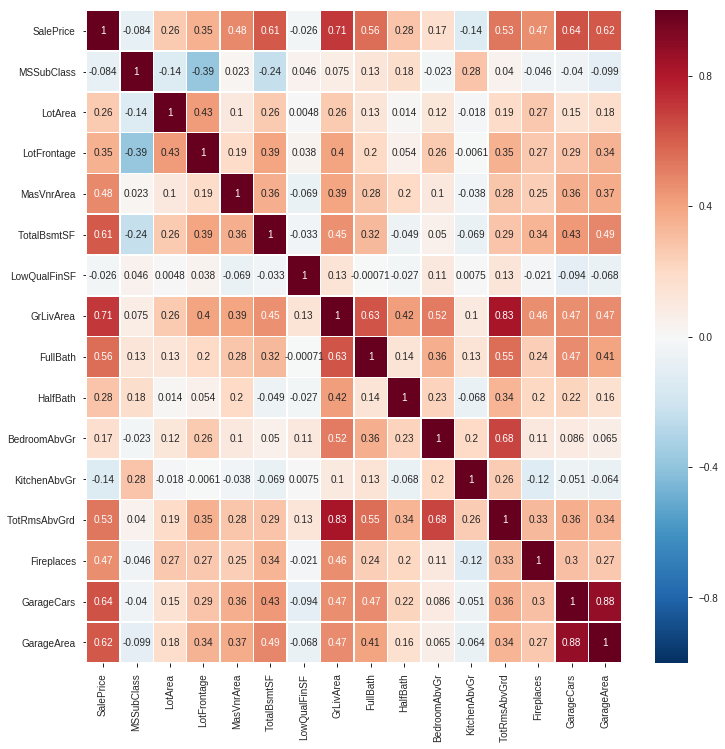

In [126]:
import seaborn as sns;
import matplotlib.pyplot as plt

myCols = ['SalePrice','MSSubClass', 'LotArea', 'LotFrontage', 'MasVnrArea', 'TotalBsmtSF', 'LowQualFinSF', 'GrLivArea', 
          'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea']
r = train_data[myCols].corr(method='pearson',min_periods=1)
plt.figure(figsize=(12, 12))
sns.heatmap(r, vmin=-1, vmax=1,
            xticklabels=r.columns,
            yticklabels=r.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

Discuss most positive and negative correlations.

From the above heatmap plotted on Pearson correlation coefficient, we can see a strong correlation between 
    - GarageArea and GarageCars : 0.88
    - GrLivArea and TotRmsAbvGrd : 0.83
    - SalePrice and GrLivArea (Above grade living area) : 0.71
    - TotRmsAbvGrd and BedroomAbvGr : 0.68
There is a significant negative correlation between
     - MSSubClass and LotFrontage : -0.39
     - MSSubClass and TotalBsmtSF : -0.24

**<h2>Part 2 - Informative Plots<h2>**

**a. Pool Quality impacting the Sale Price**

In [127]:
train_data['PoolQC'] = train_data['PoolQC'].astype(str)
train_data.groupby(['PoolQC']).mean()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
PoolQC,,,,,,,,,,,,,,,,,,,,,
Ex,690.500000,67.500000,167.000000,20521.000000,9.000000,4.50000,1957.000000,1993.000000,0.000000,1566.000000,...,85.500000,47.000000,276.000000,0.000000,0.000000,533.5,0.000000,5.000000,2006.500000,490000.000000
Fa,1099.000000,40.000000,79.000000,13416.000000,6.500000,5.50000,1976.000000,1988.500000,141.500000,726.500000,...,132.500000,56.000000,0.000000,0.000000,220.000000,583.5,1000.000000,4.000000,2006.000000,215500.000000
Gd,1298.000000,73.333333,194.500000,31152.333333,7.333333,6.00000,1983.666667,1983.666667,265.333333,2055.333333,...,334.333333,176.000000,0.000000,0.000000,0.000000,598.0,0.000000,5.333333,2007.333333,201990.000000
nan,728.876118,56.871989,69.664435,10456.461115,6.092223,5.57605,1971.255334,1984.852030,103.440830,438.377839,...,93.708190,46.379904,21.679972,3.426015,14.830695,0.0,42.322092,6.328975,2007.821060,180404.663455


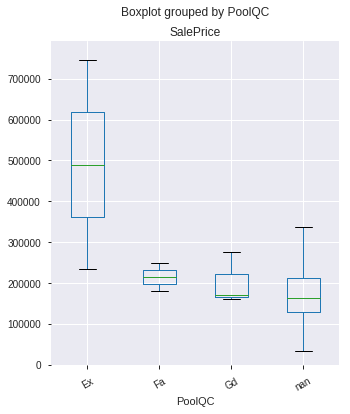

In [128]:
train_data.boxplot('SalePrice','PoolQC',rot = 30, figsize=(5,6))

The plot shows the quality of pool and the average Sale Price of the house.<br>
We can see that the houses without pool have lower price compared to the houses with pool.<br>
Also, the houses with Excellent pool quality have very high prices. Even the least price is higher than the means of other categories.<br>
So having a good quality pool will definitely help in getting a higher sale price.

**b. Avg SalePrice of Remodified houses higher than Unmodified houses over the years**

In [129]:
#train_data[['YearBuilt','YearRemodAdd','SalePrice']]
remodAvgSalePrice = train_data[train_data['YearBuilt'] != train_data['YearRemodAdd']].groupby('YearBuilt')['SalePrice'].mean()
noRemodAvgSalePrice = train_data[train_data['YearBuilt'] == train_data['YearRemodAdd']].groupby('YearBuilt')['SalePrice'].mean()
a = remodAvgSalePrice - noRemodAvgSalePrice

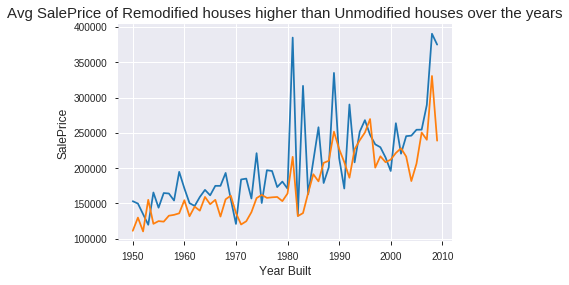

In [130]:
plt.plot(remodAvgSalePrice[-58:])
plt.plot(noRemodAvgSalePrice[:-1])
plt.xlabel('Year Built', fontsize=12)
plt.ylabel('SalePrice', fontsize=12)
plt.title('Avg SalePrice of Remodified houses higher than Unmodified houses over the years', fontsize=15)
plt.show()

The graph shows that the average Sale Price of remodelled houses had always been higher than the average Sale Price of unmodified houses.<br>
The spikes in the remodelled line plot are due to the outliers with extermely high Sale Prices.<br>
Ignoring those, the plot tells us that remodelling the houses will help in getting a better Sale Price.<br>

**c. How the Avg Sale Price and Avg LotArea changed over the years**

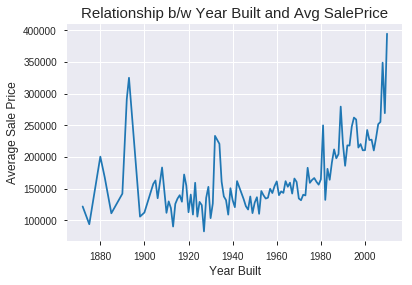

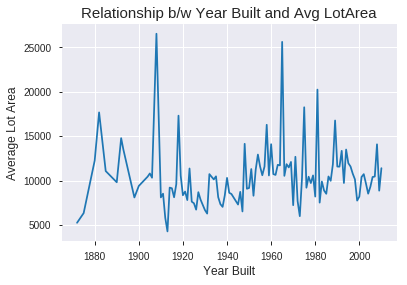

In [131]:
avgSalePrice = train_data.groupby('YearBuilt')['SalePrice'].mean()
avgLotArea = train_data.groupby('YearBuilt')['LotArea'].mean()
plt.plot(avgSalePrice)
plt.xlabel('Year Built', fontsize=12)
plt.ylabel('Average Sale Price', fontsize=12)
plt.title('Relationship b/w Year Built and Avg SalePrice', fontsize=15)
plt.show()
plt.plot(avgLotArea)
plt.xlabel('Year Built', fontsize=12)
plt.ylabel('Average Lot Area', fontsize=12)
plt.title('Relationship b/w Year Built and Avg LotArea', fontsize=15)
plt.show()


From the above plots, we can see that before 1920, the houses were quite large compared to the houses built later on. This value goes up again after 1950 which is almost the same as what we had before 1920.<br>
This could be because - 
- People actually started preferring larger houses after 1950. The dip during the period 1920-1950 could probably be explained by the World Wars that happened during the period.
- Or, the data collected during this period contains some inconsistencies.

The first graph shows how the Sale prices kept increasing. This shows that older houses doesn't yeild a good Sale Price.<br>
Interestingly, the Sale Prices of houses built during the period 1910-1950 are priced in the same range, which might confirm the World Wars theory and the quality of houses built during the period.


The spikes in the bottom graph can be explained by the unreasonably high LotArea samples in the years 1965, 1908 in the table below.

In [132]:
train_data[['YearBuilt','LotArea']].sort_values(['LotArea'],ascending=False).head(15).sort_values(['YearBuilt'])

,YearBuilt,LotArea
848,1908,45600
1396,1948,57200
457,1954,53227
271,1954,39104
249,1958,159000
313,1965,215245
335,1965,164660
706,1971,115149
451,1975,70761
53,1981,50271


Years with house samples with very large area and the corresponding largest areas.

**d. Above grade living area vs SalePrice**

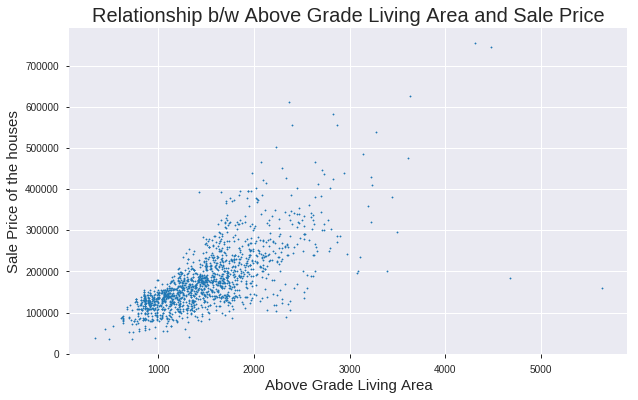

In [133]:
plt.figure(figsize=(10, 6))
plt.xlabel('Above Grade Living Area', fontsize=15)
plt.ylabel('Sale Price of the houses', fontsize=15)
plt.title('Relationship b/w Above Grade Living Area and Sale Price', fontsize=20)
plt.scatter(train_data.GrLivArea, train_data.SalePrice, s=2)

This plot shows the relation between above grade living area and the prices of these houses. We can observe that most of the houses have decent grade living area of about 800-1500square feet and these houses are priced between 100000-200000dollars. <br>
There are few outliers with exceptionally large above grade living area and those are priced very high accordingly.

**e. How price varies with the Garage Size**

In [134]:
garageCarsAvgSalePrice = train_data[['GarageCars', 'SalePrice']].groupby('GarageCars')['SalePrice'].mean()

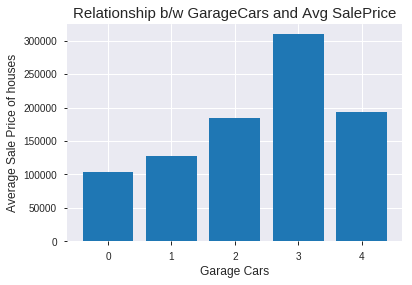

In [135]:
plt.bar(garageCarsAvgSalePrice.index, garageCarsAvgSalePrice)
plt.xlabel('Garage Cars', fontsize=12)
plt.ylabel('Average Sale Price of houses', fontsize=12)
plt.title('Relationship b/w GarageCars and Avg SalePrice', fontsize=15)
plt.show()

The above bar graph clearly shows that houses with larger Garage sizes(which fit upto 3 cars) are priced higher.<br>
Interestingly, the price of houses which would accomodate 4 cars is less. This could be because there aren't a lot of people with 4 cars or more(higher maintenance costs) so it is not meaningful to price these houses really high.

**<h2>Part 3 - Handcrafted Scoring Function<h2>**

In [136]:
#features chosen for desirability function
data1 = train_data[['SalePrice', 'LotArea', 'OverallQual', 'OverallCond', 'YearRemodAdd', 'BsmtUnfSF', 'LowQualFinSF', 'GrLivArea', 
                   'FullBath', 'HalfBath', 'BedroomAbvGr','KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 
                   'PoolArea']]

In [137]:
def desirability(row):
    score = ((row['SalePrice']*-1.5) + # penalize by 1.5 times
             (row['LotArea']*1)+
             (row['OverallQual']*1)+
             (row['OverallCond']*1)+
             (row['YearRemodAdd']*1)+
             (row['BsmtUnfSF']*-1)+  # penalize by 1 times
             (row['LowQualFinSF']*-1)+  # penalize by 1 times
             (row['GrLivArea']*1)+
             (row['FullBath']*1)+
             (row['HalfBath']*1)+
             (row['BedroomAbvGr']*1)+
             (row['KitchenAbvGr']*1)+
             (row['TotRmsAbvGrd']*1)+
             (row['Fireplaces']*1)+
             (row['GarageCars']*1)+
             (row['PoolArea']*1) 
            )
    return score

In [138]:
#scaling features to normalize them
from sklearn.preprocessing import MinMaxScaler
data1 = data1.astype(float)
scaler = MinMaxScaler()
scaledData = pd.DataFrame(scaler.fit_transform(data1), columns=data1.columns)

In [139]:
data1['score'] = scaledData.apply(desirability, axis=1)

**What is the ten most desirable houses?**

In [140]:
data1.sort_values(['score'], ascending = False).head(10)

,SalePrice,LotArea,OverallQual,OverallCond,YearRemodAdd,BsmtUnfSF,LowQualFinSF,GrLivArea,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,PoolArea,score
1298,160000.0,63887.0,10.0,5.0,2008.0,466.0,0.0,5642.0,2.0,1.0,3.0,1.0,12.0,3.0,2.0,480.0,8.157869
1386,250000.0,16692.0,7.0,5.0,1978.0,133.0,0.0,2784.0,3.0,1.0,5.0,1.0,12.0,2.0,2.0,519.0,6.823432
523,184750.0,40094.0,10.0,5.0,2008.0,878.0,0.0,4676.0,3.0,1.0,3.0,1.0,11.0,1.0,3.0,0.0,6.819671
1268,381000.0,14100.0,8.0,9.0,1997.0,536.0,0.0,3447.0,3.0,1.0,4.0,1.0,11.0,2.0,3.0,0.0,6.757019
1182,745000.0,15623.0,10.0,5.0,1996.0,300.0,0.0,4476.0,3.0,1.0,4.0,1.0,10.0,2.0,3.0,555.0,6.675050
745,299800.0,8963.0,8.0,9.0,1996.0,487.0,0.0,2715.0,3.0,1.0,4.0,1.0,11.0,2.0,2.0,0.0,6.518556
769,538000.0,53504.0,8.0,5.0,2003.0,234.0,0.0,3279.0,3.0,1.0,4.0,1.0,12.0,1.0,3.0,0.0,6.061790
11,345000.0,11924.0,9.0,5.0,2006.0,177.0,0.0,2324.0,3.0,0.0,4.0,1.0,11.0,2.0,3.0,0.0,6.025063
1350,200000.0,11643.0,5.0,5.0,1969.0,748.0,0.0,2634.0,2.0,2.0,6.0,2.0,12.0,0.0,4.0,0.0,5.995314
642,345000.0,13860.0,8.0,7.0,1995.0,542.0,0.0,2704.0,2.0,1.0,4.0,1.0,9.0,3.0,2.0,0.0,5.988341


The above 10 results shows the **most desirable** samples extracted using our desirability function.
As chosen in our desirability function, SalePrice is low for corresponding higher area and higher quality houses. ALl the other features like bedrooms, bathrooms, Fireplaces, GarageCars and PoolArea also corresponds well with our function.

**What is the ten least desirable houses?**

In [141]:
data1.sort_values(['score']).head(10)

,SalePrice,LotArea,OverallQual,OverallCond,YearRemodAdd,BsmtUnfSF,LowQualFinSF,GrLivArea,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,PoolArea,score
88,85000.0,8470.0,3.0,2.0,1982.0,1013.0,513.0,1526.0,1.0,0.0,2.0,1.0,6.0,0.0,0.0,0.0,0.953775
533,39300.0,5000.0,1.0,3.0,1950.0,0.0,0.0,334.0,1.0,0.0,1.0,1.0,2.0,0.0,0.0,0.0,1.049795
375,61000.0,10020.0,1.0,1.0,1950.0,333.0,0.0,904.0,0.0,1.0,1.0,1.0,4.0,0.0,0.0,0.0,1.076224
916,35311.0,9000.0,2.0,3.0,1950.0,430.0,0.0,480.0,0.0,0.0,1.0,1.0,4.0,0.0,1.0,0.0,1.114676
620,67000.0,8248.0,3.0,3.0,1950.0,823.0,0.0,864.0,1.0,0.0,2.0,1.0,5.0,0.0,0.0,0.0,1.352036
406,115000.0,10480.0,6.0,5.0,1950.0,1064.0,473.0,1639.0,1.0,0.0,3.0,1.0,6.0,0.0,1.0,0.0,1.520065
1337,52500.0,4118.0,4.0,4.0,1950.0,693.0,0.0,693.0,1.0,0.0,2.0,1.0,4.0,0.0,0.0,0.0,1.539150
1325,55000.0,3636.0,4.0,4.0,1950.0,796.0,0.0,796.0,1.0,0.0,2.0,1.0,5.0,0.0,0.0,0.0,1.590335
636,60000.0,6120.0,2.0,3.0,1950.0,264.0,0.0,800.0,1.0,0.0,1.0,1.0,4.0,1.0,0.0,0.0,1.597801
163,103200.0,5500.0,4.0,6.0,1956.0,882.0,0.0,882.0,1.0,0.0,1.0,1.0,4.0,0.0,0.0,0.0,1.619698


**Describe your scoring function and how well you think it worked.**

The above table shows the **10 least desirable** houses.
The higher sale price for smaller houses, poor overall conditions, and fewer bathrooms, and lower grade rooms correlates well as expected by our desirability function.<br>
**Based on these results, our desirability function performed very well.**

**<h2>Part 4 - Pairwise Distance Function</h2>**

In [142]:
from sklearn.metrics.pairwise import manhattan_distances, cosine_distances, euclidean_distances

In [143]:
tmp_df = train_data.copy()

In [144]:
def get_age_of_the_building(row):
    current_year = 2019
    year_built = row.YearBuilt
    year_remod = row.YearRemodAdd
    if year_built == year_remod:
        return current_year - year_built
    else:
        return current_year - year_remod
tmp_df['AgeWithoutReModeling'] = tmp_df[['YearBuilt', 'YearRemodAdd']].apply(get_age_of_the_building, axis=1)

In [145]:
features = [
    'SalePrice',
 'MSSubClass',
 'LotArea',
 'TotalBsmtSF',
 'LowQualFinSF',
 'GrLivArea',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'OverallQual',
 'CentralAir',
 'AgeWithoutReModeling',
 'SalePrice',
]

In [146]:
selected_feats = [
'SalePrice',
'LotArea',
'BedroomAbvGr',
'YearBuilt',
'GarageCars',
'OverallCond'
]

In [147]:
part_df = tmp_df[selected_feats]

In [148]:
print(part_df.shape)
part_df.head(3)

(1460, 6)


,SalePrice,LotArea,BedroomAbvGr,YearBuilt,GarageCars,OverallCond
0,208500,8450,3,2003,2,5
1,181500,9600,3,1976,2,8
2,223500,11250,3,2001,2,5


In [149]:
pd.set_option('mode.chained_assignment', None)
# part_df['CentralAir'].replace({'Y': 1, 'N':0}, inplace=True)

In [150]:
def calculat_similarity_matrix(df, dist_func, features):
    tmp_df = df[features]
    part_df_scaled = pd.DataFrame(scaler.fit_transform(tmp_df), columns=tmp_df.columns)
    return dist_func(part_df_scaled)

In [151]:
sim_mat = calculat_similarity_matrix(part_df, euclidean_distances, selected_feats)

In [152]:
sim_mat.max()

1.5341433254782053

In [153]:
np.where(sim_mat>1.53)

(array([1137, 1182]), array([1182, 1137]))

In [154]:
part_df.loc[1137]

SalePrice       94000
LotArea          6342
BedroomAbvGr        2
YearBuilt        1875
GarageCars          0
OverallCond         8
Name: 1137, dtype: int64

In [155]:
part_df.loc[1182]

SalePrice       745000
LotArea          15623
BedroomAbvGr         4
YearBuilt         1996
GarageCars           3
OverallCond          5
Name: 1182, dtype: int64

**How well does the distance function work? When does it do well/badly?**

**The above two records shows are the farthest points according to my distance function.<br>
This appears to be correct because the values of each variable are also very far apart.**

In [156]:
sim_mat[0][256]

0.002113975045288897

In [157]:
part_df.loc[0]

SalePrice       208500
LotArea           8450
BedroomAbvGr         3
YearBuilt         2003
GarageCars           2
OverallCond          5
Name: 0, dtype: int64

In [158]:
part_df.loc[256]

SalePrice       207500
LotArea           8791
BedroomAbvGr         3
YearBuilt         2003
GarageCars           2
OverallCond          5
Name: 256, dtype: int64

**The above records are the closest points according to the distance function.<br>
The values of each feature also implies the same thing. The 2 records are almost same.<br>
With this, we can say that our distance function performed well.**

**<h2>Part 5 - Clustering<h2>**

In [159]:
from sklearn.cluster import AgglomerativeClustering, SpectralClustering
from sklearn.decomposition import PCA

In [160]:
#clustering with distance_threshold as 2
part_df = tmp_df[selected_feats]
part_df_scaled = pd.DataFrame(scaler.fit_transform(part_df), columns=part_df.columns)
ag = AgglomerativeClustering(None, affinity='euclidean', distance_threshold=2)
ag.fit(part_df_scaled)
ag.labels_.max()

9

In [161]:
pca = PCA(2)
part_df_scaled_compress = pca.fit_transform(part_df_scaled)

In [162]:
pca_df = pd.DataFrame(part_df_scaled_compress, columns=['pca0', 'pca1'])
pca_df['labels'] = ag.labels_
pca_df['Neighborhood'] = train_data.Neighborhood
pca_df.head(2)

,pca0,pca1,labels,Neighborhood
0,-0.230551,-0.087486,5,CollgCr
1,0.007387,0.187786,6,Veenker


Text(0, 0.5, 'PCA two')

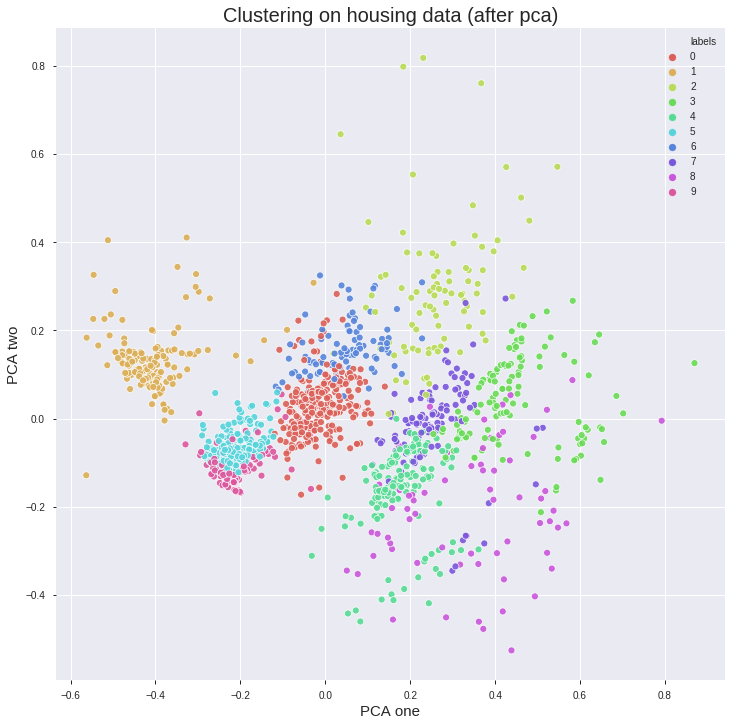

In [163]:
plt.figure(figsize=(12,12))
sns.scatterplot(
    x= 'pca0',
    y= 'pca1',
    data = pca_df,
    hue = 'labels',
    palette=sns.color_palette("hls", pca_df.labels.unique().shape[0]),
    legend="full",
    alpha=0.9
)
plt.title('Clustering on housing data (after pca)', fontsize=20)
plt.xlabel('PCA one', fontsize=15)
plt.ylabel('PCA two', fontsize=15)

**With distance_threshold as 2, we got 10 clusters. <br>
A lot of these points overlap and we dont see a proper separation between them.**

Text(0, 0.5, 'PCA two')

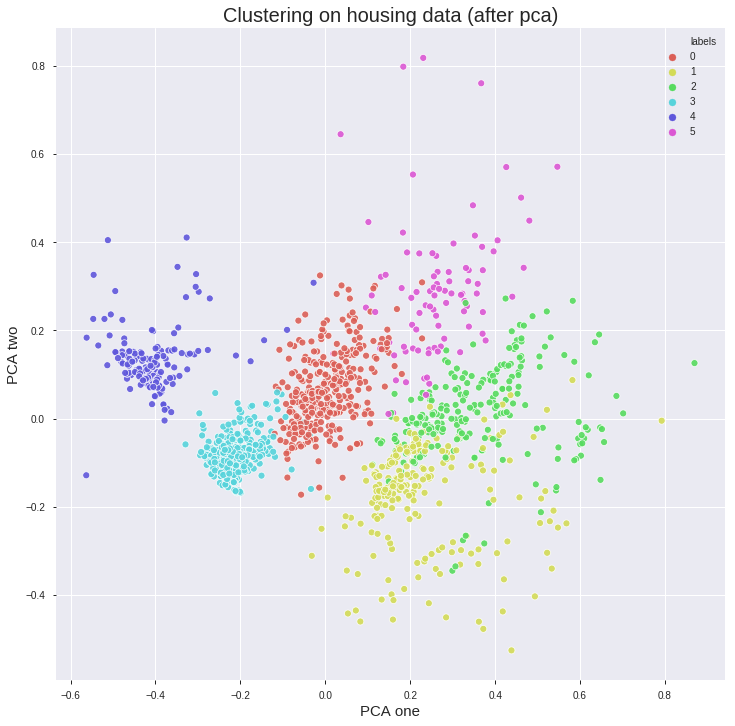

In [164]:
part_df = tmp_df[selected_feats]
part_df_scaled = pd.DataFrame(scaler.fit_transform(part_df), columns=part_df.columns)
ag = AgglomerativeClustering(None, affinity='euclidean', distance_threshold=3)
ag.fit(part_df_scaled)
ag.labels_.max()

part_df_scaled_compress = pca.fit_transform(part_df_scaled)

pca_df = pd.DataFrame(part_df_scaled_compress, columns=['pca0', 'pca1'])
pca_df['labels'] = ag.labels_
pca_df['Neighborhood'] = train_data.Neighborhood

plt.figure(figsize=(12,12))
sns.scatterplot(
    x= 'pca0',
    y= 'pca1',
    data = pca_df,
    hue = 'labels',
    palette=sns.color_palette("hls", pca_df.labels.unique().shape[0]),
    legend="full",
    alpha=0.9
)
plt.title('Clustering on housing data (after pca)', fontsize=20)
plt.xlabel('PCA one', fontsize=15)
plt.ylabel('PCA two', fontsize=15)

**How well do the clusters reflect neighborhood boundaries? Write a discussion on what your clusters capture and how well they work.**

**After increasing the distance_threshold, the number of clusters reduced to 6.<br>
Now we can see proper clusters and separation between the clusters.**

Text(0, 0.5, 'PCA two')

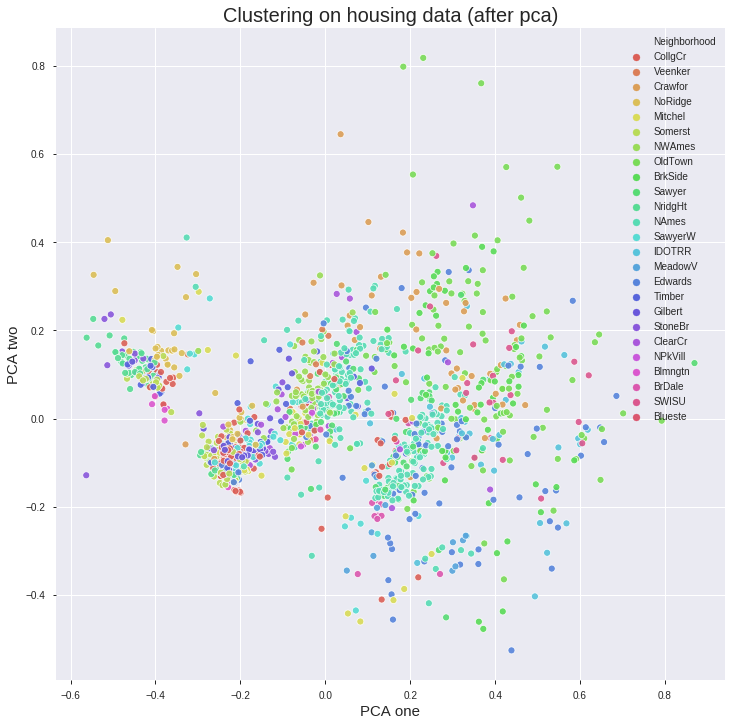

In [165]:
plt.figure(figsize=(12,12))
sns.scatterplot(
    x= 'pca0',
    y= 'pca1',
    data = pca_df,
    hue = 'Neighborhood',
    palette=sns.color_palette("hls", 25),
    legend="full",
    alpha=0.9
)
plt.title('Clustering on housing data (after pca)', fontsize=20)
plt.xlabel('PCA one', fontsize=15)
plt.ylabel('PCA two', fontsize=15)

**This plot shows the houses of different neighborhoods after clustering.<br>
We can see that there are no proper clusters here, which indicates that all neighborhoods have equally different kinds of houses. That means that the features of the houses in each neighborhood varies a lot.**

**<h2>Part 6 - Linear Regression<h2>**

In [166]:
from sklearn.linear_model import LinearRegression,RidgeCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_log_error, mean_squared_error
import math

In [167]:
features = [
 'MSSubClass', # cat
 'LotArea',
 'TotalBsmtSF',
 'LowQualFinSF',
 'GrLivArea',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'OverallCond', 
 'CentralAir',
 'AgeWithoutReModeling',
 'Neighborhood', # cat
 'PoolArea'
]
target = ['SalePrice']

In [168]:
selected_features = [
    'GrLivArea', 
    'GarageCars',
    'FullBath',
    'TotRmsAbvGrd',
    'TotalBsmtSF',
    'OverallCond'
]

In [169]:
tmp_df = train_data.copy()
tmp_df['AgeWithoutReModeling'] = tmp_df[['YearBuilt', 'YearRemodAdd']].apply(get_age_of_the_building, axis=1)

In [170]:
part_df = tmp_df[features]
part_df['CentralAir'].replace({'Y': 1, 'N':0}, inplace=True)

In [171]:
#handling categorical values for MSSublass
MSSubClass_cats = [ 60,  20,  70,  50, 190,  45,  90, 120,  30,  85,  80, 160,  75,
       180,  40]
MSSubClass_mappings = {}
for i in range(len(MSSubClass_cats)):
    tmp = np.zeros(len(MSSubClass_cats))
    tmp[i]=1
    MSSubClass_mappings[MSSubClass_cats[i]] = tmp

def f(x):
    return MSSubClass_mappings[x['MSSubClass']]

MSSubClass_df = part_df.apply(f, axis=1, result_type = 'expand')

MSSubClass_df.rename(columns={i: 'MSSubclass'+str(i) for i in range(15)}, inplace=True)

part_df_2 = pd.concat([part_df, MSSubClass_df], axis=1)

In [172]:
#handling categorical values for Neighborhood
Neighborhood = ['CollgCr', 'Veenker', 'Crawfor', 'NoRidge', 'Mitchel', 'Somerst',
       'NWAmes', 'OldTown', 'BrkSide', 'Sawyer', 'NridgHt', 'NAmes',
       'SawyerW', 'IDOTRR', 'MeadowV', 'Edwards', 'Timber', 'Gilbert',
       'StoneBr', 'ClearCr', 'NPkVill', 'Blmngtn', 'BrDale', 'SWISU',
       'Blueste']
Neighborhood_mappings = {}
for i in range(len(Neighborhood)):
    tmp = np.zeros(len(Neighborhood))
    tmp[i]=1
    Neighborhood_mappings[Neighborhood[i]] = tmp


def g(x):
    return Neighborhood_mappings[x['Neighborhood']]

Neighborhood_df = part_df.apply(g, axis=1, result_type = 'expand')    

In [173]:
part_df_3 = pd.concat([part_df, Neighborhood_df], axis=1)

In [174]:
part_df_3.drop(columns=['Neighborhood', 'MSSubClass'], inplace=True)

In [175]:
# train and test split
X = tmp_df[selected_features]
y = tmp_df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=13)

In [176]:
lr = LinearRegression(normalize=True)
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [177]:
predictions = lr.predict(X_test)
predictions = [i[0] for i in predictions]
predictions_df = pd.DataFrame({'Predictions': predictions,
                               'True': y_test.values.flatten()})
# Root Mean square value
math.sqrt(mean_squared_error(y_test, predictions))

65882.82111551768

In [178]:
rv = RidgeCV()
rv.fit(X_train, y_train)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]), cv=None, fit_intercept=True,
        gcv_mode=None, normalize=False, scoring=None, store_cv_values=False)

In [179]:
predictions = rv.predict(X_test)
predictions = [i[0] for i in predictions]
predictions_df = pd.DataFrame({'Predictions': predictions,
                               'True': y_test.values.flatten()})

In [180]:
# Root Mean square value
math.sqrt(mean_squared_error(y_test, predictions))

66028.23967077282

In [181]:
y_test.mean()

SalePrice    184509.674658
dtype: float64

Text(0.5, 1.0, 'Linear Relationship Plot b/w True and Predicted Labels')

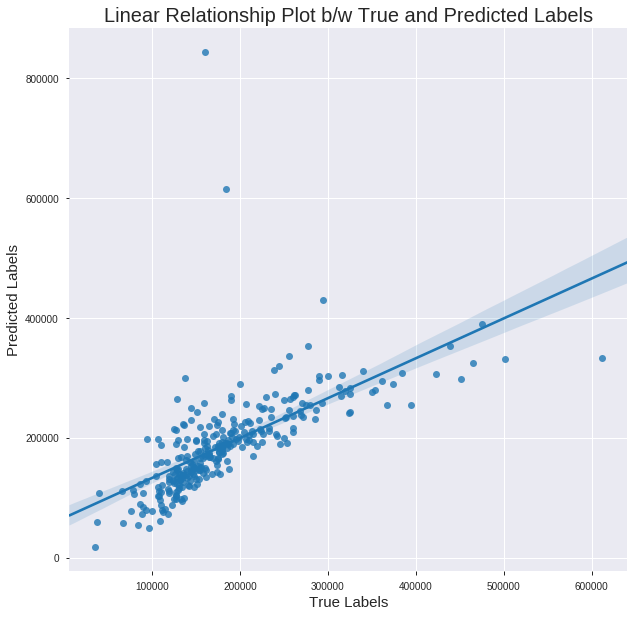

In [182]:
plt.figure(figsize=(10, 10))
sns.regplot(x = 'True', y = 'Predictions', data=predictions_df)
plt.xlabel('True Labels', fontsize=15)
plt.ylabel('Predicted Labels', fontsize=15)
plt.title('Linear Relationship Plot b/w True and Predicted Labels', fontsize=20)

**How well/badly does it work? Which are the most important variables?**

This is a linear model which tried to fit the data.
A higher degree polynomial would fit the data better.

In [183]:
for i in np.argsort(rv.coef_)[0][::-1]:
    print(selected_features[i], '---->',rv.coef_[0][i])

GarageCars ----> 24334.41163618984
FullBath ----> 11935.31433482641
OverallCond ----> 5403.490244641231
GrLivArea ----> 94.9372054040432
TotalBsmtSF ----> 61.169469993561506
TotRmsAbvGrd ----> -8597.799892566574


**<h2>Part 7 - External Dataset<h2>**

In [184]:
housingAffordData = pd.read_csv("/kaggle/input/housing-affordability/housingAffordability.csv")
bostonData = pd.read_csv("/kaggle/input/boston-housing/bostonHousing.csv")

In [185]:
housingAffordData.head()

,Control,SMSA,METRO,BEDRMS,BUILT,STATUS,TYPE,VALUE,VACANCY,TENURE,...,FMTCOSTMEDRELFMRCAT,FMTINCRELFMRCAT,FMTCOST06RELAMICAT,FMTCOST08RELAMICAT,FMTCOST12RELAMICAT,FMTCOSTMEDRELAMICAT,FMTINCRELAMICAT,FMTASSISTED,FMTBURDEN,FMTSTATUS
0,'000000054288','5000','7',4,2003,'1',1,90000,-6,'1',...,'2 50.1 - 100% FMR','2 50.1 - 100% FMR','6 100 - 120% AMI','7 120% AMI +','7 120% AMI +','6 100 - 120% AMI','4 60 - 80% AMI','.','2 30% to 50%','-5'
1,'000000054290','5000','7',2,2003,'1',1,-6,-6,'2',...,'2 50.1 - 100% FMR','2 50.1 - 100% FMR','4 60 - 80% AMI','4 60 - 80% AMI','4 60 - 80% AMI','4 60 - 80% AMI','2 30 - 50% AMI','0 Not Assisted','2 30% to 50%','-5'
2,'000000054291','5000','7',2,2007,'1',1,300000,-6,'1',...,'3 GT FMR','3 GT FMR','7 120% AMI +','7 120% AMI +','7 120% AMI +','7 120% AMI +','7 120% AMI +','.','3 50% or More','-5'
3,'000000054295','5000','7',2,2002,'1',1,-6,-6,'2',...,'3 GT FMR','3 GT FMR','7 120% AMI +','7 120% AMI +','7 120% AMI +','7 120% AMI +','6 100 - 120% AMI','0 Not Assisted','2 30% to 50%','-5'
4,'000000054296','5000','7',4,2003,'1',1,300000,-6,'1',...,'3 GT FMR','3 GT FMR','7 120% AMI +','7 120% AMI +','7 120% AMI +','7 120% AMI +','7 120% AMI +','.','1 Less than 30%','-5'


**Describe the dataset and whether this data helps with prediction.**

Housing Affordability Data System (HADS) is a dataset that measures the affordanility of houses based on Market Rents, Poverty levels, Income of households and Cost burden on households. The dataset consists a total of 98 features. The following are the some of them -<br>
ABL80 - Low Income Adjusted for # of Bedrooms<br>
ABLMED - Median Income Adjusted for # of Bedrooms<br>
AGE Age - of head of household<br>
BUILT - Year unit was built<br>
BEDRMS - # of bedrooms in unit<br>
BURDEN - Housing cost as a fraction of income<br>
COST08 - Housing cost at 8 percent interest<br>
COSTMED - Housing cost at Median interest<br>
FMR - Fair market rent (average)<br>
FMTMETRO - CENTRAL CITY / SUBURBAN STATUS<br>
FMTOWNRENT - Owner/Renter Status (adjusted)<br>
FMTSTATUS - Occupancy Status<br>
FMTSTRUCTURETYPE - Structure Type<br>
NUNITS - # of units in building<br>
OTHERCOST - Insurance, condo, land rent, other mobile home fees<br>
TOTSAL - Total Wage Income<br>
TYPE - Structure Type<br>
ZINC2 - Household Income<br>
ZSMHC - Monthly housing costs<br>


Most of these features appear to represent the economic status of household rather than the features of a housing property like our original dataset. 

It has very few features similar to our housing data set, like Year Built, Number of Bedrooms, and the price can be derived approximately using the cost at various interest rates. So some analysis related to the age, number of bedrooms and price could be performed by integrating with our data.

The major issue here would be the size of the dataset. With 65898 samples, it can easily dominate our original dataset which has 1460 samples only and reduce its significance.


In [186]:
housingAffordData.rename(columns={'BUILT':'YearBuilt'}, inplace=True)

In [187]:
amesHousing = train_data.copy()
mergedData = pd.merge(amesHousing, housingAffordData, on='YearBuilt', how='left')

In [188]:
X = mergedData[selected_features]
y = mergedData[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=13)

In [189]:
lr = LinearRegression(normalize=True)
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [190]:
predictions = lr.predict(X_test)
predictions = [i[0] for i in predictions]
predictions_df = pd.DataFrame({'Predictions': predictions,
                               'True': y_test.values.flatten()})

In [191]:
# Root Mean square value
math.sqrt(mean_squared_error(y_test, predictions))

41050.118820235766

**The root mean square error is little better here compared to linear regression(65882.821) and<br> ridge regression(66028.239) from previous section.**

In [192]:
bostonData.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


Boston Housing is a very popular housing dataset with features related to different social and economic conditions of the areas on Boston. The following are the features from this dataset - 

RIM - per capita crime rate by town<br>
ZN - proportion of residential land zoned for lots over 25,000 sq.ft.<br>
INDUS - proportion of non-retail business acres per town.<br>
CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)<br>
NOX - nitric oxides concentration (parts per 10 million)<br>
RM - average number of rooms per dwelling<br>
AGE - proportion of owner-occupied units built prior to 1940<br>
DIS - weighted distances to five Boston employment centres<br>
RAD - index of accessibility to radial highways<br>
TAX - full-value property-tax rate per  thousand 10000 dollars. <br>
PTRATIO - pupil-teacher ratio by town<br>
B - 1000(Bk - 0.63)^2the proportion of blacks by town <br>
LSTAT - percentage lower status of the population<br>
MEDV - Median value of owner-occupied homes in $1000's<br>

We can see that none of these features is related to any feature in our original dataset. So there would not be any value addition by integrating it with our dataset.

**<h2>Cleaning for modelling<h2>**

In [193]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_log_error
from sklearn.model_selection import KFold, cross_val_score, StratifiedKFold
import numpy as np
from sklearn.model_selection import permutation_test_score
from sklearn.metrics import make_scorer

In [194]:
def clean(df):    
    # Misc
    df['PoolQC'] = df['PoolQC'].fillna('Nothing')

    # Misc Features
    df['MiscFeature'] = df['MiscFeature'].fillna('Nothing')

    # Alley
    df['Alley'] = df['Alley'].fillna('Nothing')

    # Fence
    df['Fence'] = df['Fence'].fillna('Nothing')

    # FireplaceQu
    df['FireplaceQu'] = df['FireplaceQu'].fillna('Nothing') 

    # LotFrontage
    df['LotFrontage'] = df.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

    # GarageCond
    df['GarageCond'] = df['GarageCond'].fillna('Nothing') 

    # GarageType
    df['GarageType'] = df['GarageType'].fillna('Nothing') 

    # GarageYrBlt
    df['GarageYrBlt'] = df['GarageYrBlt'].fillna(0)

    # GarageFinish
    df['GarageFinish'] = df['GarageFinish'].fillna('Nothing') 

    # GarageQual
    df['GarageQual'] = df['GarageQual'].fillna('Nothing') 

    # BsmtExposure
    df['BsmtExposure'] = df['BsmtExposure'].fillna('Nothing')

    # BsmtFinType2
    df['BsmtFinType2'] = df['BsmtFinType2'].fillna('Nothing')

    # BsmtFinType1
    df['BsmtFinType1'] = df['BsmtFinType1'].fillna('Nothing')

    # BsmtCond
    df['BsmtCond'] = df['BsmtCond'].fillna('Nothing')

    # BsmtQual
    df['BsmtQual'] = df['BsmtQual'].fillna('Nothing')

    # MasVnrArea
    df['MasVnrArea'] = df['MasVnrArea'].fillna(0)

    # MasVnrType
    df['MasVnrType'] = df['MasVnrArea'].fillna('Nothing')

    # Electrical
    df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])
    
    # MSZoning
    df['MSZoning'] = df['MSZoning'].fillna(df['MSZoning'].mode()[0])
    
    # Functional
    df['Functional'] = df['Functional'].fillna("Typ")
    
    # Utilities 
    if 'Utilities' in df.columns:
        df.drop(columns = ['Utilities'], inplace=True)
    
    # BsmtFullBath  
    df['BsmtFullBath'] = df['BsmtFullBath'].fillna(0)
    
    # BsmtHalfBath  
    df['BsmtHalfBath'] = df['BsmtHalfBath'].fillna(0)
    
    # TotalBsmtSF  
    df['TotalBsmtSF'] = df['TotalBsmtSF'].fillna(0)
    
    # SaleType    
    df['SaleType'] = df['SaleType'].fillna(df['SaleType'].mode()[0])
    

    # GarageArea     
    df['GarageArea'] = df['GarageArea'].fillna(0)
    
    # Exterior1st   
    df['Exterior1st'] = df['Exterior1st'].fillna(df['Exterior2nd'].mode()[0])
    
    # BsmtUnfSF      
    df['BsmtUnfSF'] = df['BsmtUnfSF'].fillna(0)
    
    # Exterior2nd   
    df['Exterior2nd'] = df['Exterior2nd'].fillna(df['Exterior2nd'].mode()[0])
    
    # KitchenQual   
    df['KitchenQual'] = df['KitchenQual'].fillna(df['Exterior2nd'].mode()[0])
    
    # GarageCars    
    df['GarageCars'] = df['GarageArea'].fillna(0)
    
    # BsmtFinSF2   
    df['BsmtFinSF2'] = df['BsmtFinSF2'].fillna(0)
    
    # BsmtFinSF1      
    df['BsmtFinSF1'] = df['BsmtFinSF1'].fillna(0)
    
    # convert objects to integers
    for i in df.dtypes[df.dtypes == 'object'].index.values:
        df[i] = LabelEncoder().fit_transform(df[i].values)
        
    return df

In [195]:
test_df = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')
train_df_copy = train_data.copy()
train_data_copy = clean(train_data)

In [196]:
train_X = train_data_copy.drop(columns=['SalePrice', 'Id'])
train_y = train_data_copy['SalePrice']

In [197]:
# convert objects to integers
for i in train_data_copy.dtypes[train_data_copy.dtypes == 'object'].index.values:
    train_data_copy[i] = LabelEncoder().fit_transform(train_data_copy[i].values)

In [198]:
def test_model(model, test_x, test_y):
    predictions = model.predict(test_x)
    rmsle = math.sqrt(mean_squared_error(test_y, predictions))
    return rmsle

In [199]:
kf = KFold(5).get_n_splits(train_data_copy)

In [200]:
def root_mean_square_log_error(y_true, y_pred):
    if isinstance(y_pred, list):
        y_pred = np.array(y_pred)
    neg_val_indexes = np.where(y_pred<0.01)
    if len(neg_val_indexes[0]):
        y_pred[neg_val_indexes] = 0.01
    return np.sqrt(mean_squared_log_error(y_true, y_pred))

In [201]:
def cross_validated_score(model, X, y):
    return cross_val_score(model, X, y, scoring=make_scorer(root_mean_square_log_error), cv = kf).mean()

In [202]:
def submission_file(model, test_x, Id, name='Submission.csv'):
    predictions = model.predict(test_x)
    submission_df = pd.DataFrame(data={
    'SalePrice': predictions,
    'Id': Id
    })
    submission_df.to_csv(name, index=False)

**<h2>Part 8 - Permutation Test<h2>**

In [203]:
good_features = ['GrLivArea', 
    'GarageCars',
    'FullBath',
    'TotRmsAbvGrd',
    'OverallCond',
    'GrLivArea'
]

bad_features = ['KitchenAbvGr',
'LowQualFinSF',
'MSSubClass',
'BedroomAbvGr']

In [204]:
for feat in good_features:
    score, permutation_scores, pvalue = permutation_test_score(lr, train_X[[feat]], train_y, 
                        scoring=make_scorer(root_mean_square_log_error), n_permutations=100, n_jobs=1)
    print(f'Feature: {feat} \nscore: {score} \npvalue: {pvalue}')
    if pvalue > 0.05:
        print('The model is not statistically significant.\n\n')
    else:
        print('The model is statistically significant.\n\n')

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Feature: GrLivArea 
score: 0.2768658733933098 
pvalue: 1.0
The model is not statistically significant.




/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Feature: GarageCars 
score: 0.3171035426283351 
pvalue: 1.0
The model is not statistically significant.




/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Feature: FullBath 
score: 0.33218251579122776 
pvalue: 1.0
The model is not statistically significant.




/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Feature: TotRmsAbvGrd 
score: 0.34244936909716844 
pvalue: 1.0
The model is not statistically significant.




/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Feature: OverallCond 
score: 0.40775457729895664 
pvalue: 0.6039603960396039
The model is not statistically significant.




/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Feature: GrLivArea 
score: 0.2768658733933098 
pvalue: 1.0
The model is not statistically significant.




None of the good features are significant.

In [205]:
for feat in bad_features:
    score, permutation_scores, pvalue = permutation_test_score(lr, train_X[[feat]], train_y, 
                        scoring=make_scorer(root_mean_square_log_error), n_permutations=100, n_jobs=1)
    print(f'Feature: {feat} \nscore: {score} \npvalue: {pvalue}')
    if pvalue > 0.05:
        print('The model is not statistically significant.\n\n')
    else:
        print('The model is statistically significant.\n\n')

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Feature: KitchenAbvGr 
score: 0.4031915242051105 
pvalue: 1.0
The model is not statistically significant.




/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Feature: LowQualFinSF 
score: 0.4074548631247213 
pvalue: 0.8613861386138614
The model is not statistically significant.




/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Feature: MSSubClass 
score: 0.4063732751697627 
pvalue: 1.0
The model is not statistically significant.




/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Feature: BedroomAbvGr 
score: 0.398868111842645 
pvalue: 1.0
The model is not statistically significant.




None of the bad features are also significant

**<h2>Part 9 - Model<h2>**

**Ridge Regression**

In [206]:
#Ridge Regression
test_df_part = train_data[selected_features]
test_df_part['GarageCars'].fillna(test_df_part.GarageCars.mean(), inplace=True)
test_df_part['TotalBsmtSF'].fillna(test_df_part.TotalBsmtSF.mean(), inplace=True)
test_df_part.isna().sum()
predictions = rv.predict(test_df_part)
predictions = [i[0] for i in predictions]
len(predictions)

1460

**Random Forests**

In [207]:
"""
from sklearn.ensemble import RandomForestRegressor
RFR = RandomForestRegressor(n_estimators=2500, )
cross_validated_score(RFR, train_X, train_y)
"""

'\nfrom sklearn.ensemble import RandomForestRegressor\nRFR = RandomForestRegressor(n_estimators=2500, )\ncross_validated_score(RFR, train_X, train_y)\n'

**Gradient Boosting**

In [208]:
from sklearn.ensemble import GradientBoostingRegressor
GBR = GradientBoostingRegressor(n_estimators=3500, max_depth=5, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber',learning_rate=0.05,)
cross_validated_score(GBR, train_X, train_y)

0.12858697941550867

In [209]:
GBR.fit(train_X, train_y)
test_df = clean(test_df)
test_x = test_df

In [210]:
submission_file(GBR, test_df.drop(columns=['Id']), test_df.Id, name='./Submission_GBR_all_feats.csv')

<h2>**Part 10 - Final Result**</h2>

Report the rank, score, number of entries, for your highest rank. Include a snapshot of your best score on the leaderboard as confirmation. Be sure to provide a link to your Kaggle profile. Make sure to include a screenshot of your ranking. Make sure your profile includes your face and affiliation with SBU.

Kaggle Link: [www.kaggle.com/ujwalvemulasbu](https://www.kaggle.com/ujwalvemulasbu)

Highest Rank: 1672

Score: 0.12762

Number of entries: 5

INCLUDE IMAGE OF YOUR KAGGLE RANKING
[https://drive.google.com/file/d/1C9iD-QJ3T3DVUu0x1mwirE5z-oZ_trNU/view?usp=sharing](https://drive.google.com/file/d/1C9iD-QJ3T3DVUu0x1mwirE5z-oZ_trNU/view?usp=sharing)